## Importing required liberaries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import shap
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
import pickle


## Loading dataset 

In [2]:
# Loading the csv file
df=pd.read_csv('Liver_disease_data.csv')
df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.857584,17.272828,0,1,0.658940,0,0,42.734240,1
1,71,1,30.732470,2.201266,0,1,1.670557,1,0,67.309822,1
2,48,0,19.971407,18.500944,0,0,9.928308,0,0,63.738956,0
3,34,1,16.615417,12.632870,0,0,5.630129,0,0,64.555873,1
4,62,1,16.065830,1.087815,0,1,3.566218,1,0,77.868689,1


## Exploratory Data Analysis

In [3]:
df.info() #checking the data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB


In [4]:
df.isna().sum() #checking the null values in dataset

Age                   0
Gender                0
BMI                   0
AlcoholConsumption    0
Smoking               0
GeneticRisk           0
PhysicalActivity      0
Diabetes              0
Hypertension          0
LiverFunctionTest     0
Diagnosis             0
dtype: int64

In [5]:
df.describe() #statistical summary of dataset

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,50.394118,0.504118,27.699801,9.832309,0.291765,0.521765,5.000993,0.142353,0.154706,59.863867,0.550588
std,17.641915,0.500130,7.210400,5.757472,0.454708,0.666262,2.847074,0.349515,0.361730,22.996262,0.497581
min,20.000000,0.000000,15.004710,0.003731,0.000000,0.000000,0.001852,0.000000,0.000000,20.019254,0.000000
25%,35.000000,0.000000,21.455414,4.841811,0.000000,0.000000,2.622121,0.000000,0.000000,40.024216,0.000000
50%,51.000000,1.000000,27.925367,9.828195,0.000000,0.000000,5.022883,0.000000,0.000000,59.513146,1.000000
75%,66.000000,1.000000,33.957668,14.871671,1.000000,1.000000,7.401642,0.000000,0.000000,79.428755,1.000000
max,80.000000,1.000000,39.992845,19.952456,1.000000,2.000000,9.994964,1.000000,1.000000,99.991413,1.000000


### Count plot of Diagnosis

C:\Users\kedar\AppData\Local\Temp\ipykernel_6244\3222533271.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='Set2')


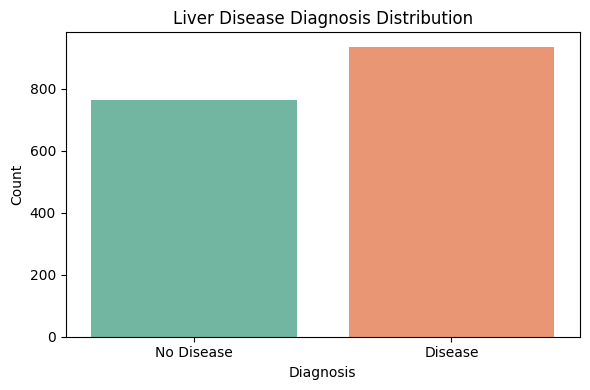

In [6]:
# Visualizing the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df, palette='Set2')
plt.title('Liver Disease Diagnosis Distribution')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.ylabel('Count')
plt.xlabel('Diagnosis')
plt.tight_layout()
plt.show()

### Box plots of key numerical features by Diagnosis

C:\Users\kedar\AppData\Local\Temp\ipykernel_6244\4244002212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=df, palette='coolwarm')
C:\Users\kedar\AppData\Local\Temp\ipykernel_6244\4244002212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=df, palette='coolwarm')
C:\Users\kedar\AppData\Local\Temp\ipykernel_6244\4244002212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diagnosis', y=feature, data=df, palette='coolwarm')
C:\Users\kedar\AppData\Local\Temp\ipykernel_62

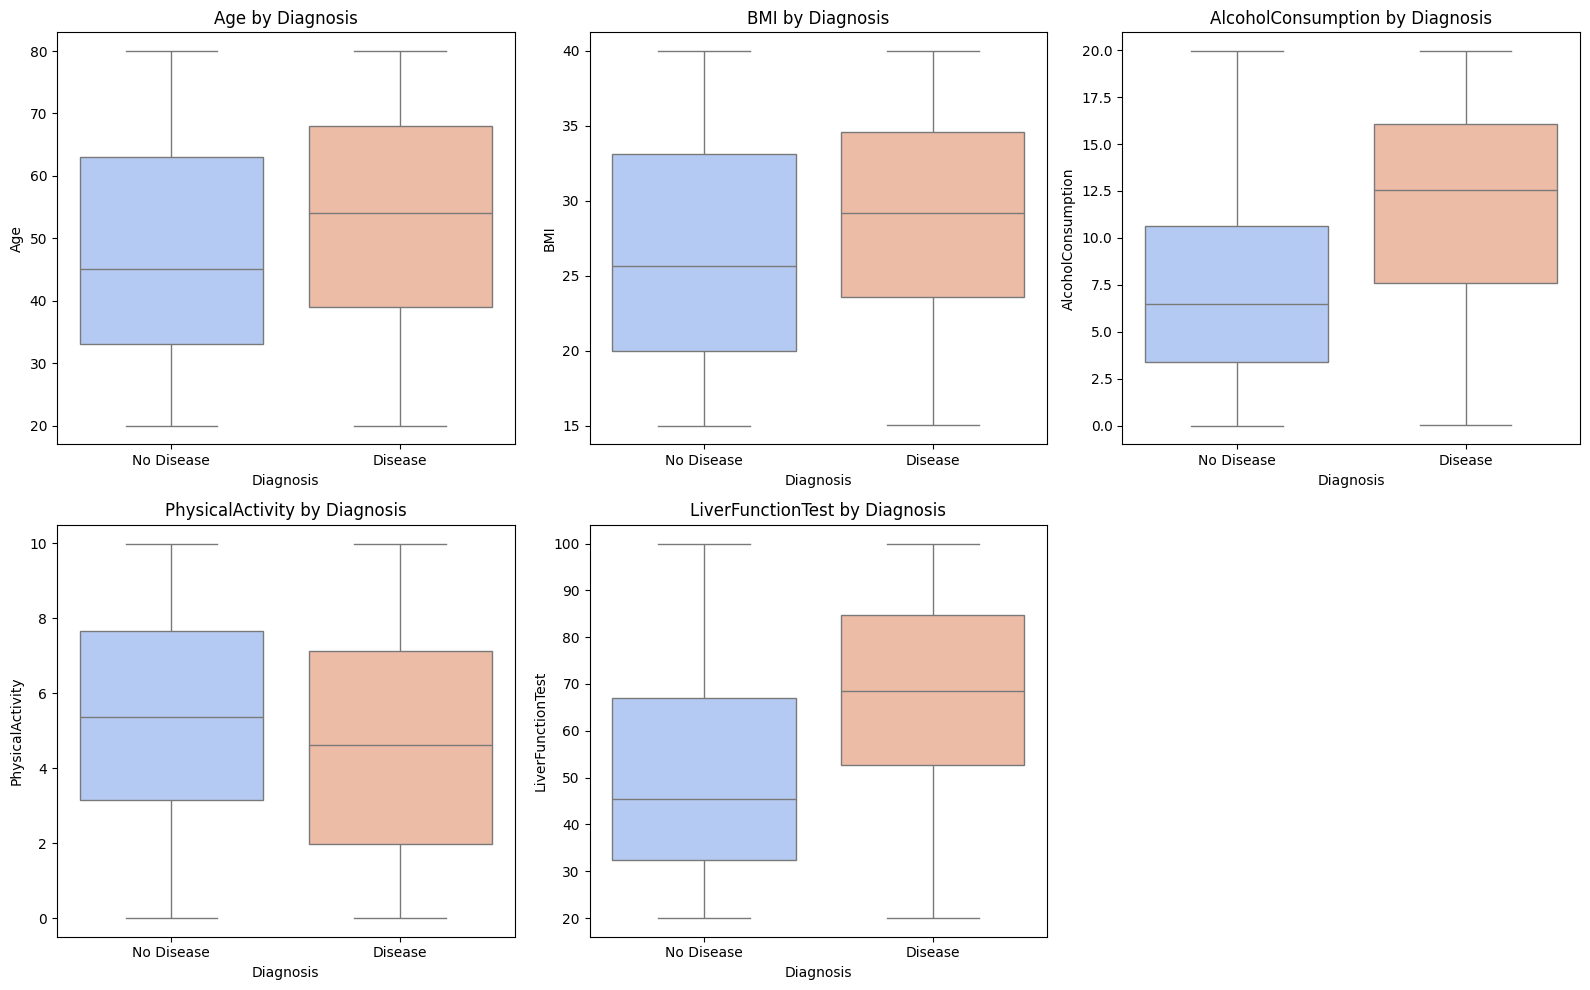

In [7]:
features = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'LiverFunctionTest']
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='Diagnosis', y=feature, data=df, palette='coolwarm')
    plt.xticks([0, 1], ['No Disease', 'Disease'])
    plt.title(f'{feature} by Diagnosis')
plt.tight_layout()
plt.show()

### Correlation heatmap

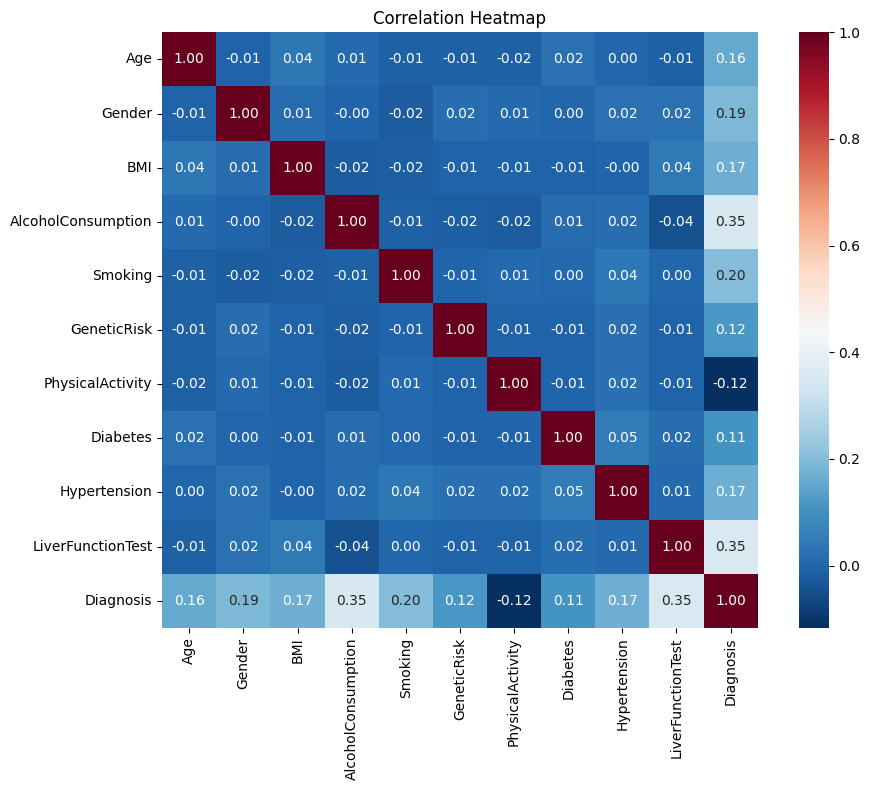

In [8]:
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### Categorical variable distributions

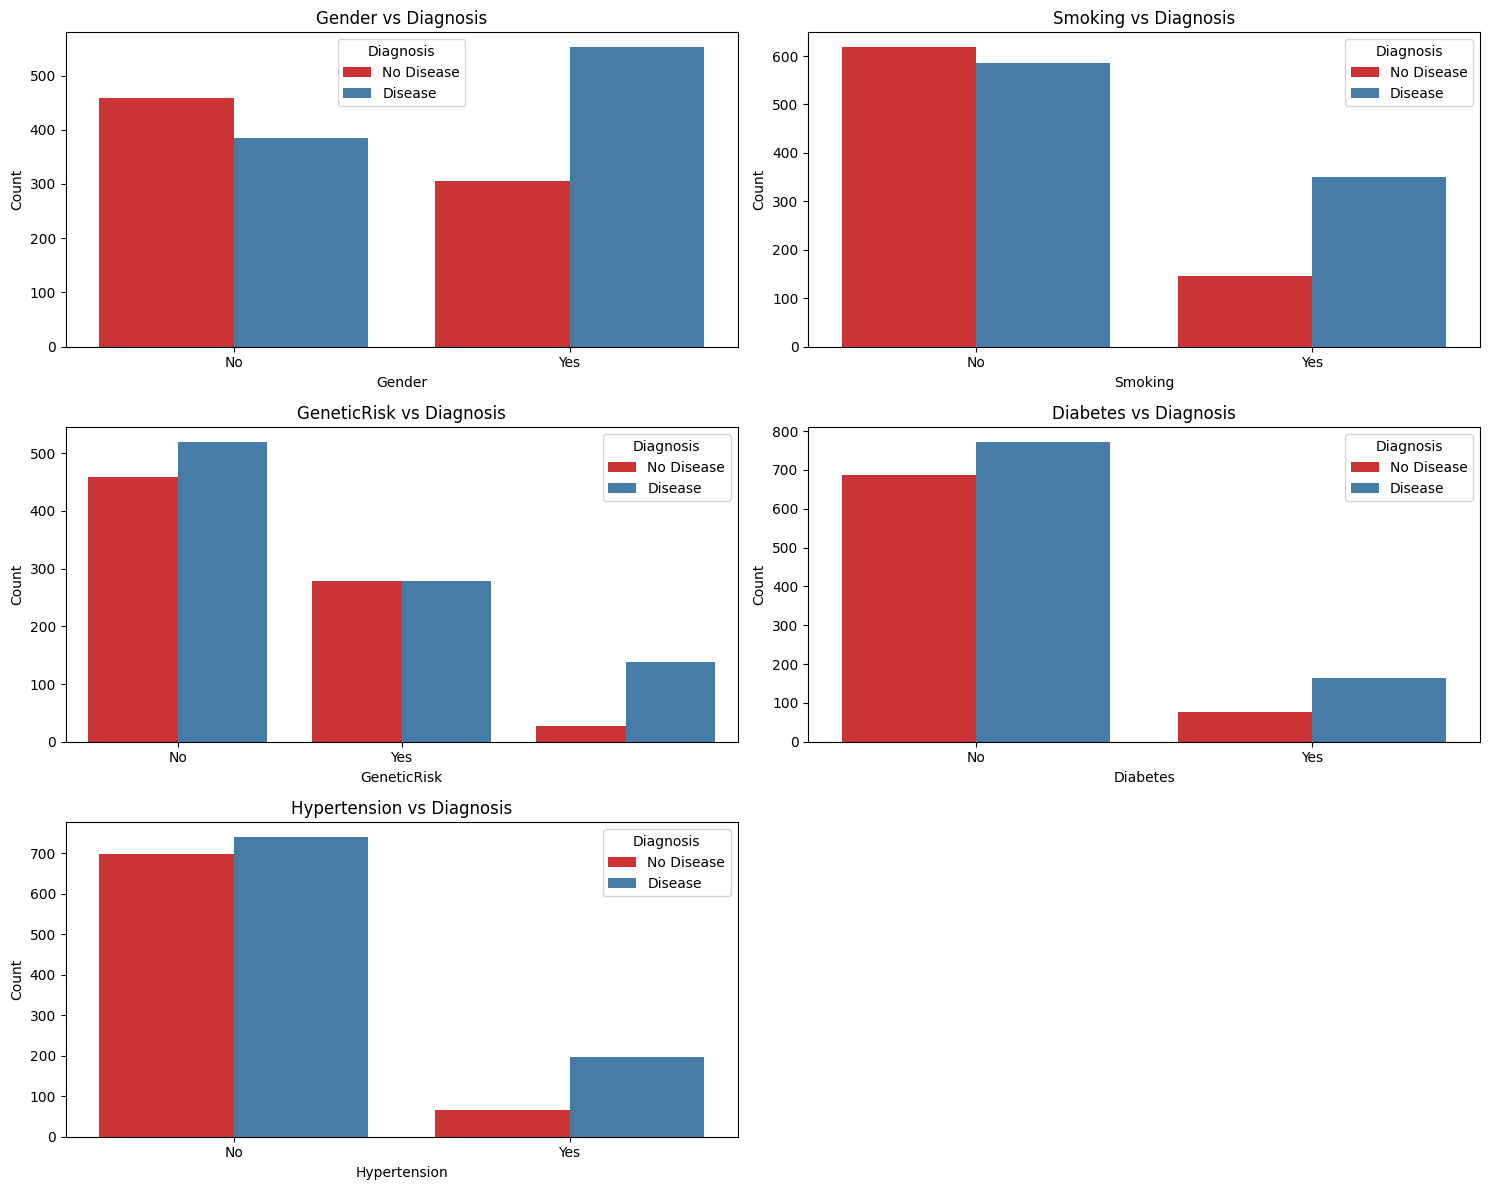

In [9]:
categorical_vars = ['Gender', 'Smoking', 'GeneticRisk', 'Diabetes', 'Hypertension']

plt.figure(figsize=(15, 12))
for i, var in enumerate(categorical_vars):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=var, hue='Diagnosis', data=df, palette='Set1')
    plt.title(f'{var} vs Diagnosis')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Diagnosis', labels=['No Disease', 'Disease'])
plt.tight_layout()
plt.show()

### Histograms for numerical variables

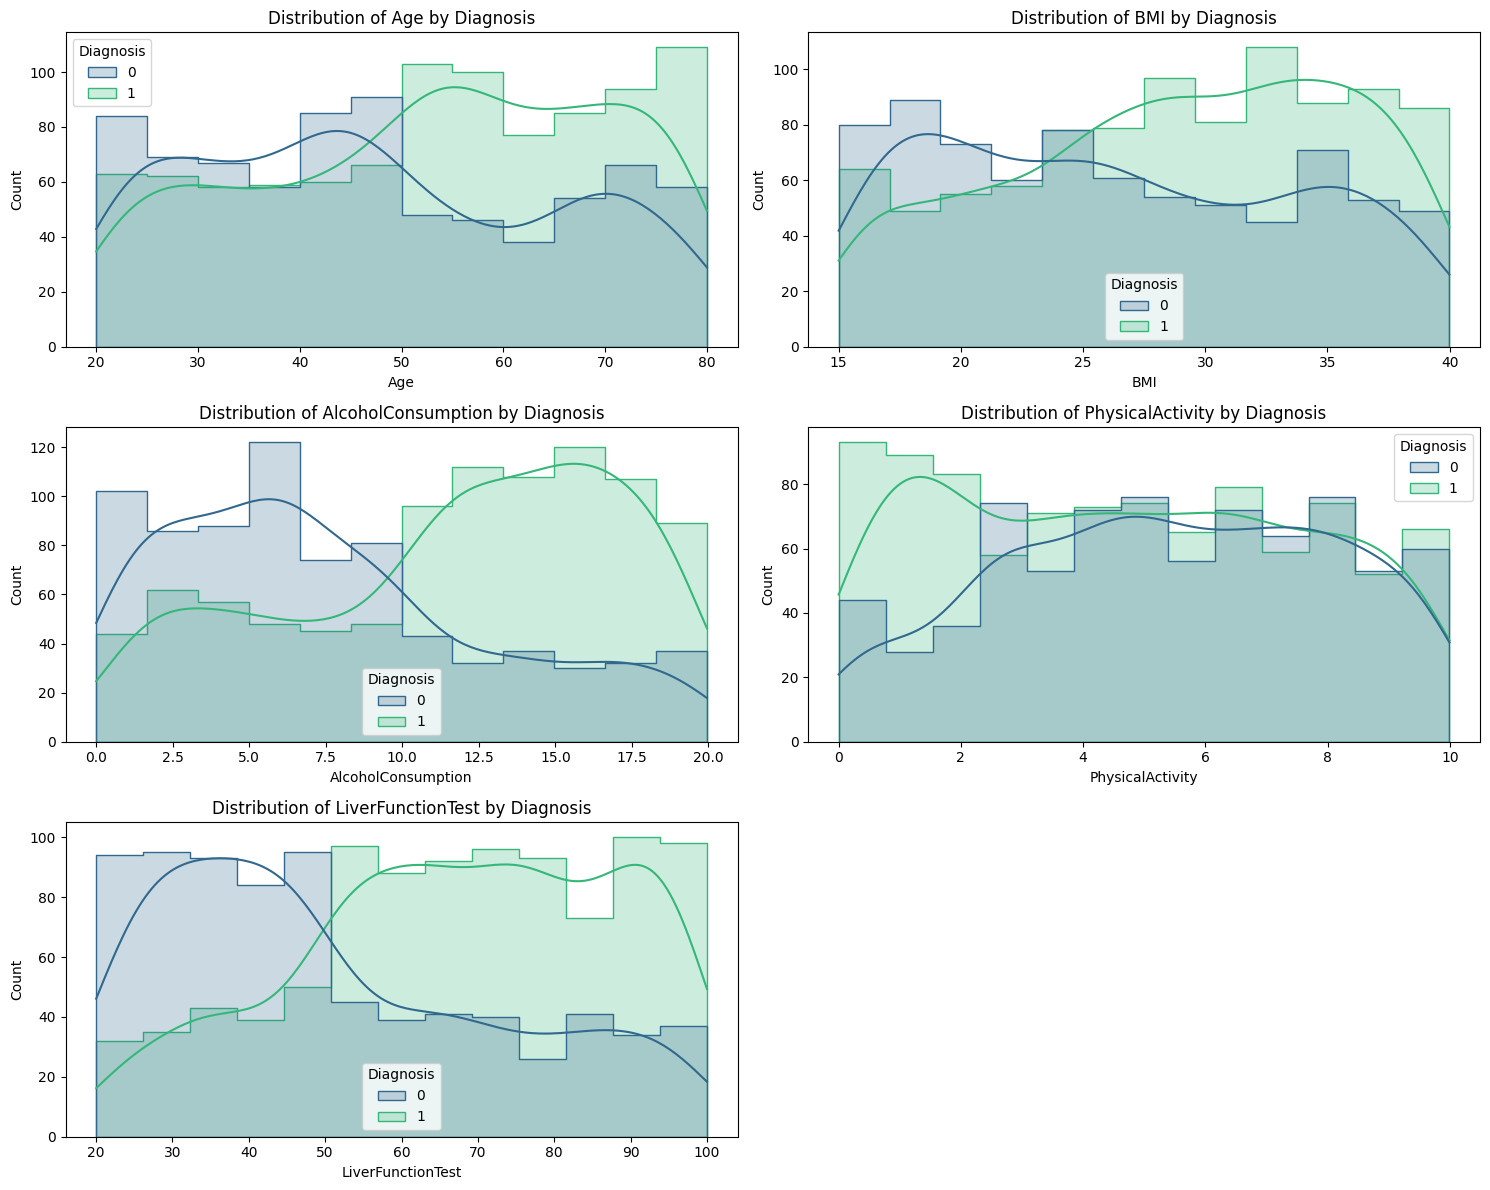

In [10]:
numerical_vars = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'LiverFunctionTest']

plt.figure(figsize=(15, 12))
for i, var in enumerate(numerical_vars):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data=df, x=var, hue='Diagnosis', kde=True, palette='viridis', element='step')
    plt.title(f'Distribution of {var} by Diagnosis')
plt.tight_layout()
plt.show()

### Box plots for numerical features to detect outliers

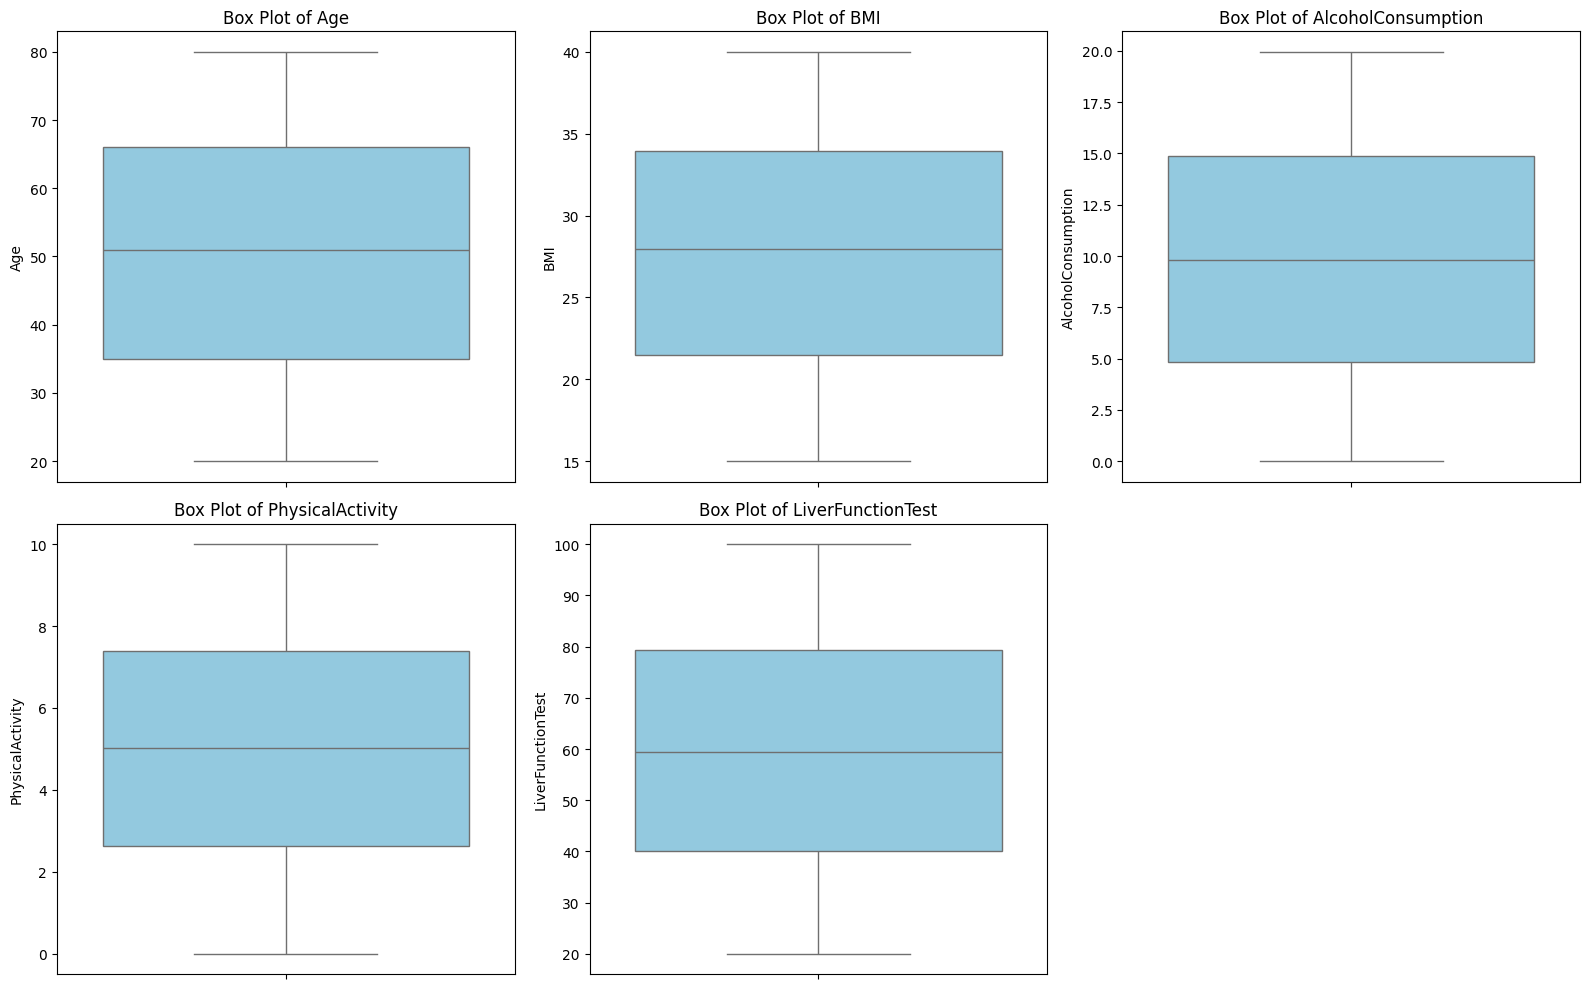

In [11]:
numerical_vars = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'LiverFunctionTest']

plt.figure(figsize=(16, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=var, data=df, color='skyblue')
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

### Feature importances plot 

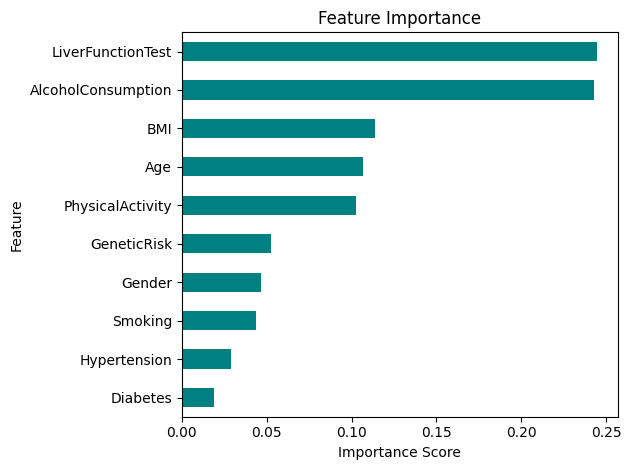

In [12]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest
model = RandomForestClassifier(random_state=0)
model.fit(X, y)

# Plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='teal')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

### Chi-square test

In [13]:
cat_features = ['Gender', 'Smoking', 'GeneticRisk', 'Diabetes', 'Hypertension']

for col in cat_features:
    contingency_table = pd.crosstab(df[col], df['Diagnosis'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f'Chi-square test for {col}: p-value = {p:.4f}')

Chi-square test for Gender: p-value = 0.0000
Chi-square test for Smoking: p-value = 0.0000
Chi-square test for GeneticRisk: p-value = 0.0000
Chi-square test for Diabetes: p-value = 0.0000
Chi-square test for Hypertension: p-value = 0.0000


### Key insights from EDA

- **Liver Function Test (LFT)** is the most powerful indicator of liver disease.
- **Alcohol Consumption**, **Genetic Risk**, and **Physical Activity** also show strong influence.
- All categorical features — **Gender**, **Smoking**, **Genetic Risk**, **Diabetes**, and **Hypertension** — are statistically associated with liver disease (p < 0.05 in Chi-square test).
- No significant outliers were detected in the numerical data.
- Data is well-prepared for predictive modeling with balanced feature coverage across lifestyle, clinical, and genetic factors.

### Data Preprocessing

In [14]:
#Splitting the dataset into training and testing sets 
X=df.drop('Diagnosis', axis=1)
y=df['Diagnosis']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)


In [15]:
# Scaling the Features
scalar= StandardScaler()
X_train_sc= scalar.fit_transform(X_train)
X_test_sc= scalar.transform(X_test)

In [16]:
# Checking the shape of the datasets
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((1360, 10), (340, 10), (1360,), (340,))

### XGBoost Classifier Model Training

In [17]:
# training the XGBoost Model
model=XGBClassifier( 
    colsample_bytree=0.6,
    learning_rate=0.05,
    max_depth=3,
    n_estimators=200,
    subsample=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42)
model.fit(X_train_sc, y_train)

c:\Users\kedar\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:58:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### Model Evaluation

In [18]:
# evaluating the model
y_pred =model.predict(X_test_sc)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       153
           1       0.95      0.88      0.91       187

    accuracy                           0.91       340
   macro avg       0.91      0.91      0.91       340
weighted avg       0.91      0.91      0.91       340



In [19]:
precision = precision_score(y_test, y_pred) #presion score
recall = recall_score(y_test, y_pred) #recall
f1 = f1_score(y_test, y_pred) #F1 Score
acc_score=accuracy_score(y_test,y_pred) #accuracy Score
# AUC ROC score
y_pred_proba = model.predict_proba(X_test_sc)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f'Accuracy Score: {acc_score:.4f}')
print(f"AUC ROC Score: {auc_roc:.4f}")

Precision: 0.9483
Recall: 0.8824
F1 Score: 0.9141
Accuracy Score: 0.9088
AUC ROC Score: 0.9591


In [20]:
# Confusion Matrix Score
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred))

Confusion Matrix:  [[144   9]
 [ 22 165]]


### Grid Search Algorithm for finding best Parameters

In [21]:
# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],          
    'max_depth': [3, 4, 5, 6],                
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'subsample': [0.6, 0.8, 1],               
    'colsample_bytree': [0.6, 0.8, 1],     
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid_search.fit(X_train_sc, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


c:\Users\kedar\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.6, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.6, 0.8, 1]},
             scoring='accuracy', verbose=1)

In [22]:
# Best Paeameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}


### K-fold Cross validation

In [23]:
#Cross-Validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

c:\Users\kedar\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\kedar\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\kedar\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are

In [24]:
# results of cross-validation
print("K-Fold Accuracy Scores:", cv_scores)
print("Mean Accuracy: {:.4f}".format(np.mean(cv_scores)))
print("Standard Deviation: {:.4f}".format(np.std(cv_scores)))

K-Fold Accuracy Scores: [0.94117647 0.88235294 0.91764706 0.9        0.92941176 0.92941176
 0.91764706 0.92941176 0.89411765 0.94705882]
Mean Accuracy: 0.9188
Standard Deviation: 0.0198


### Pipeline for Model

In [25]:
# creating pipeline for model training 
pipeline=Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(
    colsample_bytree=0.6,
    learning_rate=0.05,
    max_depth=3,
    n_estimators=200,
    subsample=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42)
    )
])

In [26]:
# fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

c:\Users\kedar\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.6, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

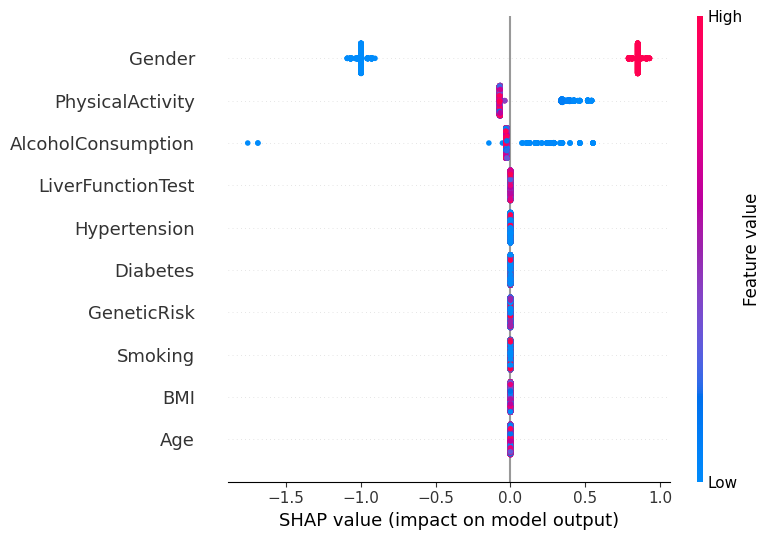

In [27]:
# Initialize SHAP explainer
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Global summary plot
shap.summary_plot(shap_values, X)

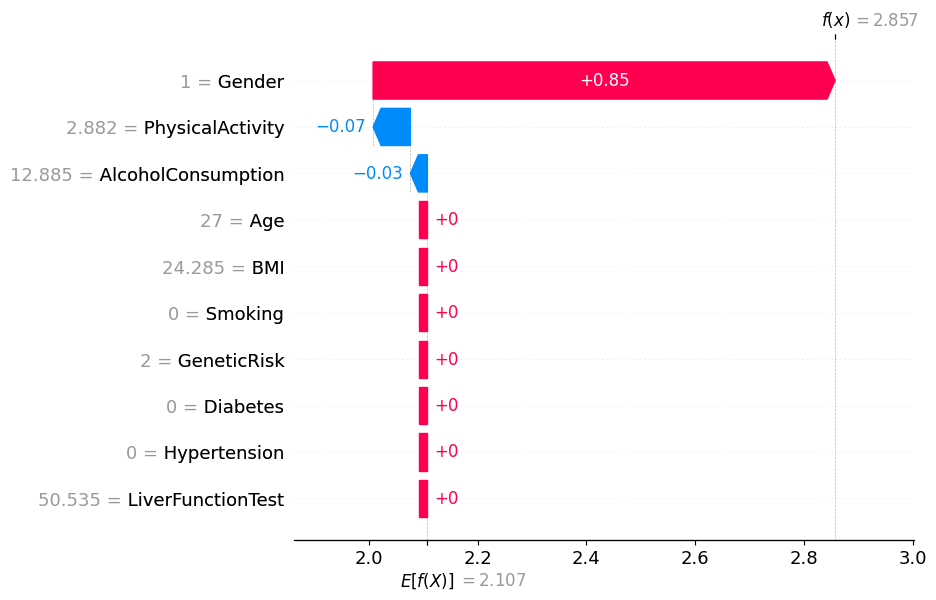

In [28]:
# Feature importance plot
sample_index = 5
shap.plots.waterfall(shap_values[sample_index])

### Creating pickle file for deployment

In [29]:
# save the model
with open('liver_disease_model.pkl','wb') as file:
    pickle.dump(pipeline, file)